[nltk_data] Downloading package punkt to C:\Users\G.
[nltk_data]     Ragachandrika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             content predicted_sentiment
0  im getting on borderlands and i will murder yo...             Neutral
1  I am coming to the borders and I will kill you...             Neutral
2  im getting on borderlands and i will kill you ...             Neutral
3  im coming on borderlands and i will murder you...             Neutral
4  im getting on borderlands 2 and i will murder ...             Neutral

Sentiment Distribution:
predicted_sentiment
Positive    33913
Negative    21212
Neutral     18871
Name: count, dtype: int64


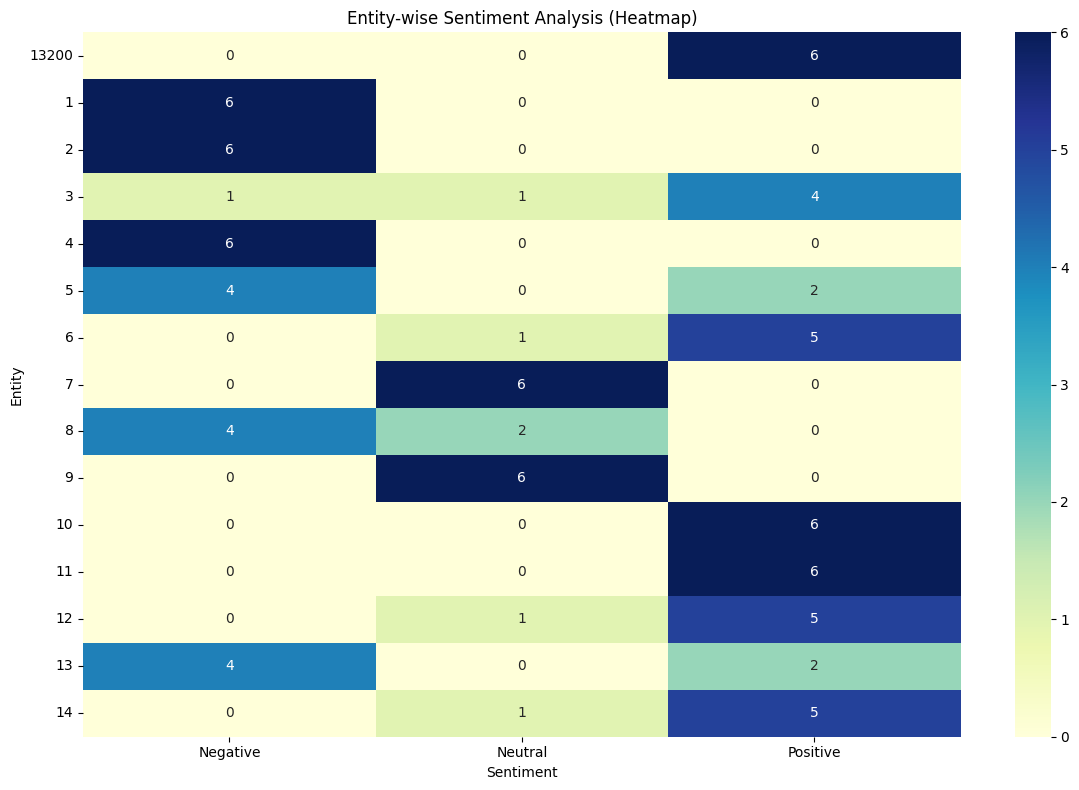

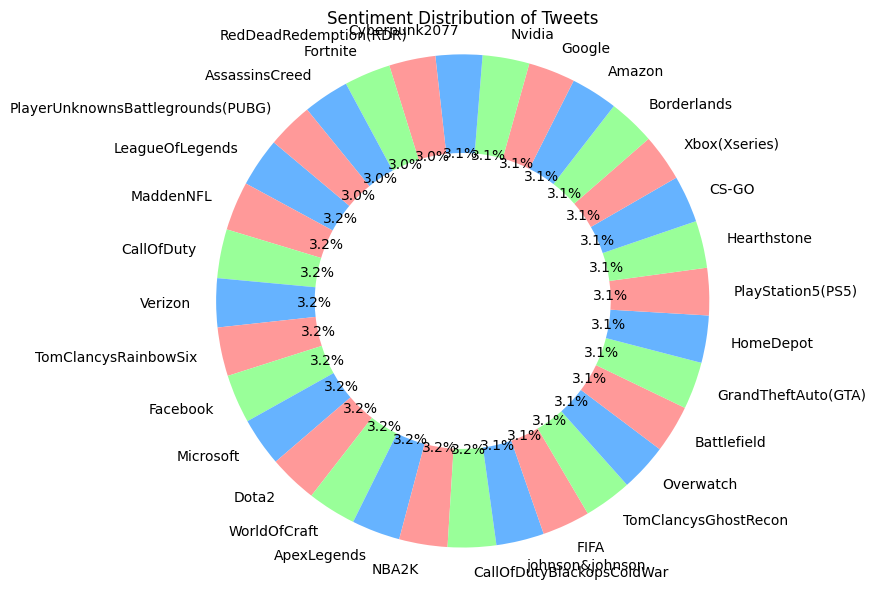

In [21]:
# Step 1: Import Libraries
import pandas as pd
import re
from textblob import TextBlob
import nltk

# Step 2: Download necessary NLTK data
nltk.download('punkt')  # Required for TextBlob tokenization

# Step 3: Load the dataset
df = pd.read_csv("C:\\Users\\G. Ragachandrika\\Downloads\\archive\\twitter_training.csv", header=None)
df.columns = ['entity', 'sentiment', 'blank', 'content']  # Rename columns for clarity

# Step 4: Drop rows with missing content
df = df.dropna(subset=['content'])

# Step 5: Clean the text
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|@\w+|#\w+', '', text)   # Remove URLs, mentions, hashtags
        text = re.sub(r'[^\w\s]', '', text.lower())     # Remove punctuation, convert to lowercase
        return text
    return ""

df['cleaned'] = df['content'].apply(clean_text)

# Step 6: Define sentiment analysis function using TextBlob
def get_sentiment(text):
    if isinstance(text, str) and text.strip() != "":
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    return 'Neutral'

# Step 7: Apply sentiment analysis
df['predicted_sentiment'] = df['cleaned'].apply(get_sentiment)

# Step 8: View the results
print(df[['content', 'predicted_sentiment']].head())

# Optional: Count sentiment categories
print("\nSentiment Distribution:")
print(df['predicted_sentiment'].value_counts())


import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data as above
sentiment_counts = pd.crosstab(df['entity'], df['predicted_sentiment'])

# Optionally select top entities to keep the heatmap readable
top_entities = sentiment_counts.sum(axis=1).sort_values(ascending=False).head(15).index
sentiment_counts_top = sentiment_counts.loc[top_entities]

plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_counts_top, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Entity-wise Sentiment Analysis (Heatmap)')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(7,7))
colors = ['#66b3ff','#ff9999','#99ff99']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'width':0.4})
plt.title('Sentiment Distribution of Tweets')
plt.axis('equal')
plt.show()
